### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

### Get the data

In [2]:
columns = ['date', 'time', 'event_type', 'location', 'user_id', 'source', 'topic']

In [3]:
read = pd.read_csv('/home/katz/dilans-blog/data/all_read.csv', delimiter = ';', names = columns)
read['date'] = pd.to_datetime(read['date'], format='%Y-%m-%d')
read = read.drop(columns=['time'])
read

,date,event_type,location,user_id,source,topic
0,2018-01-01,read,country_7,2458151261,SEO,North America
1,2018-01-01,read,country_7,2458151262,SEO,South America
2,2018-01-01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01,read,country_7,2458151264,AdWords,Europe
4,2018-01-01,read,country_8,2458151265,Reddit,North America
...,...,...,...,...,...,...
581872,2018-03-31,read,country_4,2458361163,NaN,Africa
581873,2018-03-31,read,country_6,2458361177,NaN,Asia
581874,2018-03-31,read,country_7,2458361244,NaN,North America
581875,2018-03-31,read,country_7,2458361267,NaN,Europe


### Daily unique readers

In [4]:
read = read[(read['date'] < '2018-03-31')]
daily_readers = read[['date', 'user_id']].groupby('date').nunique()[['user_id']].reset_index()
daily_readers = daily_readers['user_id'].tolist()

In [5]:
daily_readers

[1795,
 1849,
 1886,
 1987,
 2043,
 2102,
 2107,
 2161,
 2271,
 2288,
 2335,
 2370,
 2421,
 2568,
 2549,
 2661,
 2633,
 2539,
 2842,
 2839,
 2706,
 2734,
 2798,
 3230,
 3001,
 3098,
 3230,
 3502,
 3673,
 3325,
 3321,
 3352,
 3825,
 3828,
 4091,
 3652,
 4052,
 3637,
 4217,
 3848,
 3826,
 4739,
 4189,
 3922,
 3791,
 4386,
 4438,
 4424,
 4097,
 4856,
 4584,
 5596,
 5356,
 4862,
 5726,
 6127,
 4861,
 5424,
 5644,
 5443,
 6487,
 5727,
 6138,
 6430,
 6086,
 5319,
 5491,
 5205,
 6609,
 5764,
 6315,
 5943,
 4941,
 6275,
 6406,
 6011,
 5531,
 5219,
 6060,
 7992,
 7162,
 7531,
 7600,
 7264,
 6714,
 7839,
 6851,
 6649,
 7034]

### Defining the feature(x) and target(y) variables

In [6]:
x = range(len(daily_readers))
y = daily_readers

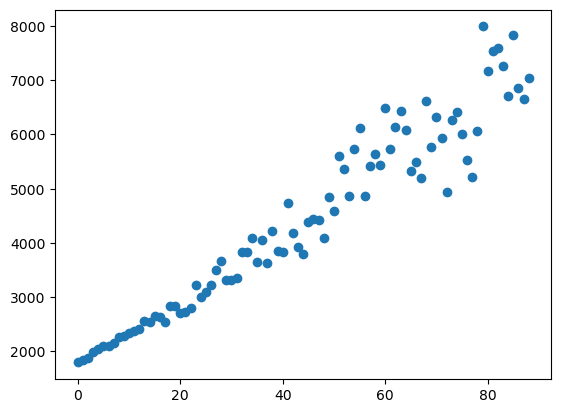

In [7]:
plt.scatter(x,y)

### Linear Regression

In [8]:
coefs = np.polyfit(x, y, 1)

In [9]:
coefs

array([  63.4416922 , 1660.81273408])

In [10]:
predict = np.poly1d(coefs)

#### Testing accuracy

In [11]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.9313490523503978

#### Fit the line

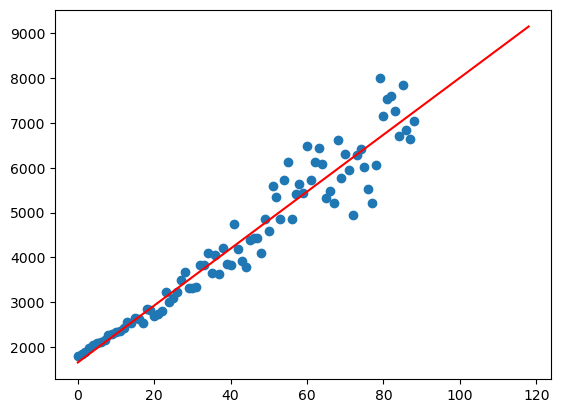

In [12]:
x_test = range(0, len(daily_readers) + 30)
y_pred = predict(x_test)
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')

### Polynomial Regression

In [13]:
x = range(len(daily_readers))
y = daily_readers

In [14]:
coefs = np.polyfit(x, y, 4)
predict = np.poly1d(coefs)

#### Testing accuracy

In [16]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.9326850501530637

#### Fit the line

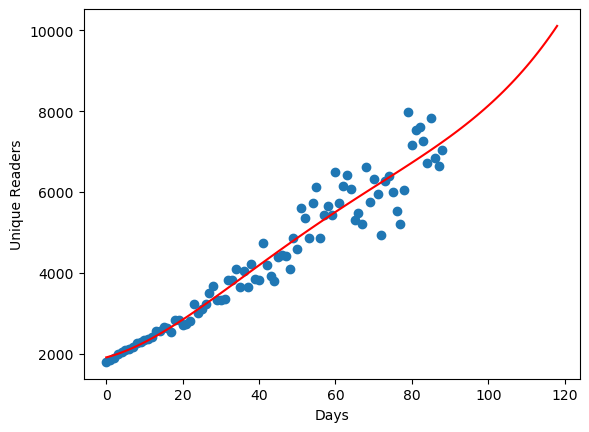

In [15]:
x_test = range(0, len(daily_readers) + 30)
y_pred = predict(x_test)
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.xlabel('Days')
plt.ylabel('Unique Readers')
plt.show()

#### Readers prediction in 30 days

In [17]:
results = []
for i in range(90,len(daily_readers) + 30):
    print(f'{i} -> {int(predict(i))}')
    results.append({'day': i - 90, 'unique_readers': int(predict(i))})

90 -> 7375
91 -> 7445
92 -> 7516
93 -> 7588
94 -> 7662
95 -> 7737
96 -> 7814
97 -> 7892
98 -> 7972
99 -> 8054
100 -> 8138
101 -> 8224
102 -> 8312
103 -> 8402
104 -> 8495
105 -> 8590
106 -> 8688
107 -> 8789
108 -> 8892
109 -> 8998
110 -> 9108
111 -> 9220
112 -> 9336
113 -> 9456
114 -> 9579
115 -> 9706
116 -> 9836
117 -> 9971
118 -> 10110


In [18]:
results = pd.DataFrame(results)

In [21]:
results.to_csv('/home/katz/dilans-blog/analysis/readers_prediction.csv', index = False)